# ASSIGNMENT: 4

### TASK: SIMPLE LINEAR REGRESSION

To Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using Python.

IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

IMPORTING THE DATA

In [2]:
dt = pd.read_csv('C:\Excelrpy\Assignment-4\delivery_time.csv')

In [3]:
dt.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [4]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [5]:
dt.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


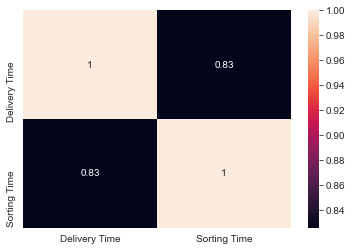

In [73]:
sns.heatmap(dt.corr(),annot=True)

In [16]:
dt.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


Text(0.5, 1.0, 'Delivery time vs Sorting time')

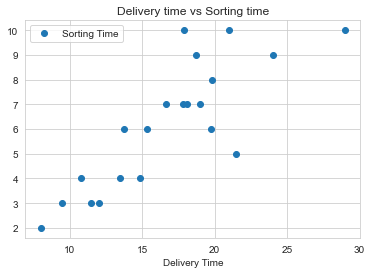

In [18]:
sns.set_style('whitegrid')
dt.plot(x='Delivery Time',y='Sorting Time',style='o')
plt.title('Delivery time vs Sorting time')

OBSERVATION:
    
From the above data we can observe that the data is positively co-related and it is linear    

### SPLITTING THE DATA INTO TRAIN AND TEST DATA

In [19]:
x = dt.iloc[:,1].values.reshape(-1,1)
y = dt.iloc[:,0].values 

In [20]:
x

array([[10],
       [ 4],
       [ 6],
       [ 9],
       [10],
       [ 6],
       [ 7],
       [ 3],
       [10],
       [ 9],
       [ 8],
       [ 4],
       [ 7],
       [ 3],
       [ 3],
       [ 4],
       [ 6],
       [ 7],
       [ 2],
       [ 7],
       [ 5]], dtype=int64)

In [21]:
y

array([21.  , 13.5 , 19.75, 24.  , 29.  , 15.35, 19.  ,  9.5 , 17.9 ,
       18.75, 19.83, 10.75, 16.68, 11.5 , 12.03, 14.88, 13.75, 18.11,
        8.  , 17.83, 21.5 ])

In [22]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                            test_size=0.2, random_state=0) 

### BUILDING THE MODEL AND FITTING THE MODEL

In [23]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(x_train, y_train) 

print("Training complete.")

Training complete.


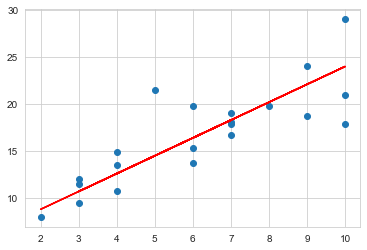

In [24]:
# Plotting the regression line
line = regressor.coef_*x+regressor.intercept_

# Plotting for the test data
plt.scatter(x, y)
plt.plot(x, line,'r');
plt.show()

PREDICTED VALUES OF X TEST

In [25]:
#print(x_test) # Testing data - In Hours
y_pred = regressor.predict(x_test)
y_pred

array([23.97793478, 10.70456522, 14.49695652, 12.60076087, 12.60076087])

In [26]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,17.90,23.977935
1,11.50,10.704565
2,21.50,14.496957
3,13.50,12.600761
4,10.75,12.600761


### PREDICTING THE VALUE GIVEN FROM INPUT

In [27]:

delivery_time = 13.5
own_pred = regressor.predict([[delivery_time]])
print("Delivery_time is = {}".format(delivery_time))
print("Predicted sorting time = {}".format(own_pred[0]))

Delivery_time is = 13.5
Predicted sorting time = 30.61461956521739


In [28]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:',
        metrics.mean_squared_error(y_test, y_pred))
print('R_Squared score(test):',
        metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 3.3252826086956504
Mean Squared Error: 18.17011449669186
R_Squared score(test): -0.09171780724674106


### APPLYING TRANSFORMATION TO GET BETTER ACCURACY

QUANTILE TRANSFORM

In [29]:
from sklearn.preprocessing import QuantileTransformer

In [30]:
qt = QuantileTransformer(random_state=0)
qtdf = qt.fit_transform(dt)
qtdf = qt.transform(dt)
df_qtdata = pd.DataFrame(data=qtdf, columns=['Delivery Time','Sorting Time'])
df_qtdata.head()

C:\Users\Public\anacon\lib\site-packages\sklearn\preprocessing\_data.py:2354: UserWarning: n_quantiles (1000) is greater than the total number of samples (21). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


,Delivery Time,Sorting Time
0,0.85,1.000
1,0.25,0.225
2,0.75,0.450
3,0.95,0.825
4,1.00,1.000


In [31]:
x=df_qtdata[['Delivery Time']].values
y=df_qtdata['Sorting Time'].values

In [32]:
x

array([[0.85],
       [0.25],
       [0.75],
       [0.95],
       [1.  ],
       [0.4 ],
       [0.7 ],
       [0.05],
       [0.55],
       [0.65],
       [0.8 ],
       [0.1 ],
       [0.45],
       [0.15],
       [0.2 ],
       [0.35],
       [0.3 ],
       [0.6 ],
       [0.  ],
       [0.5 ],
       [0.9 ]])

In [33]:
y

array([1.   , 0.225, 0.45 , 0.825, 1.   , 0.45 , 0.625, 0.075, 1.   ,
       0.825, 0.75 , 0.225, 0.625, 0.075, 0.075, 0.225, 0.45 , 0.625,
       0.   , 0.625, 0.35 ])

In [34]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                            test_size=0.2, random_state=0)

In [35]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(x_train, y_train) 

print("Training complete.")

Training complete.


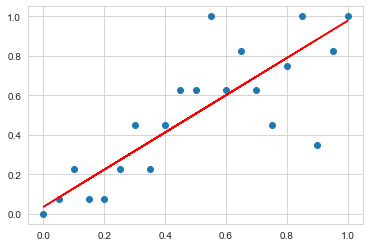

In [36]:
# Plotting the regression line
line = regressor.coef_*x+regressor.intercept_

# Plotting for the test data
plt.scatter(x, y)
plt.plot(x, line,'r');
plt.show()

In [37]:
print(x_test) # Testing data - In Hours
y_pred = regressor.predict(x_test)

[[0.55]
 [0.15]
 [0.9 ]
 [0.25]
 [0.1 ]]


In [38]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,1.000,0.553779
1,0.075,0.177039
2,0.350,0.883426
3,0.225,0.271224
4,0.225,0.129946


In [39]:

delivery_time = 13.5
own_pred = regressor.predict([[delivery_time]])
print("Delivery_time is = {}".format(delivery_time))
print("Predicted sorting time = {}".format(own_pred[0]))

Delivery_time is = 13.5
Predicted sorting time = 12.750737347782371


In [40]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:',
        metrics.mean_squared_error(y_test, y_pred))
print('R_Squared score(test):',
        metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 0.2445927829292816
Mean Squared Error: 0.10104815893582457
R_Squared score(test): 0.03992248041971902


In [41]:
data=df_qtdata.rename(columns={"Delivery Time":"Dtime","Sorting Time":"Stime"})

### APPLYING OLS TECHNIQUE

ON QUANTILE TRANSFORM DATA

In [42]:
import statsmodels.formula.api as smf
modelnew=smf.ols('Dtime~Stime',data=data).fit()

In [43]:
modelnew.rsquared

0.64745924450257

 ON LOG TRANSFORM

In [44]:
data_log=dt.rename(columns={"Delivery Time":"Dtime","Sorting Time":"Stime"})

In [45]:
model_log=smf.ols('np.log(Dtime)~np.log(Stime)',data=data_log).fit()

In [46]:
model_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(Dtime)   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     64.39
Date:                Sun, 11 Apr 2021   Prob (F-statistic):           1.60e-07
Time:                        21:53:03   Log-Likelihood:                 10.291
No. Observations:                  21   AIC:                            -16.58
Df Residuals:                      19   BIC:                            -14.49
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         1.7420      0.133     13.086      0.000       1.463       2.021
np.log(Stime)     0.5975      0.074      8.024      0.000       0.442       0.753
==============================================================================
Omnibus:                        1.871   Durbin-Watson:                   1.322
Prob(Omnibus):                  0.392   Jarque-Bera (JB):                1.170
Skew:                           0.577   Prob(JB):                        0.557
Kurtosis:                       2.916   Cond. No.                         9.08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

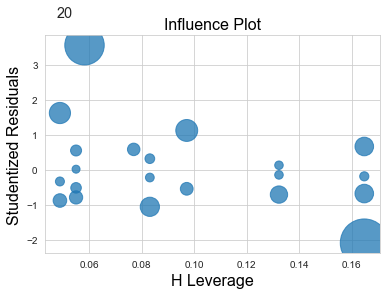

In [47]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(modelnew)
plt.show()

### COOKS DISTANCE

In [48]:
from statsmodels.graphics.regressionplots import influence_plot
model_influence = modelnew.get_influence()
(c, _) = model_influence.cooks_distance

<ipython-input-49-47cc5ff6c0cd>:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(np.arange(len(data)), np.round(c, 3))


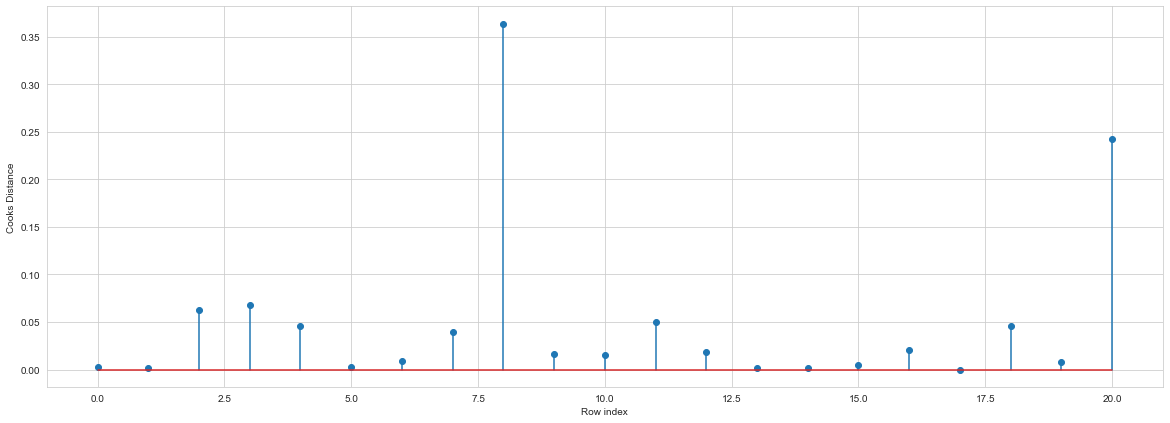

In [49]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(data)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [50]:
(np.argmax(c),np.max(c))

(8, 0.36432681077758305)

In [51]:
dt_new=pd.read_csv('C:\Excelrpy\Assignment-4\delivery_time.csv')

In [52]:
dt1=dt_new.drop(dt_new.index[[8,20,4]],axis=0).reset_index()

In [58]:
dt1.head()

,index,Delivery Time,Sorting Time
0,0,21.00,10
1,1,13.50,4
2,2,19.75,6
3,3,24.00,9
4,5,15.35,6


In [54]:
data1=dt1.rename(columns={"Delivery Time":"Dtime","Sorting Time":"Stime"})

In [55]:
modelnew1=smf.ols('Dtime~Stime',data=data1).fit()

In [56]:
modelnew1.rsquared

0.8332330202945817

In [57]:
(modelnew1.rsquared,modelnew1.aic)

(0.8332330202945817, 74.89939393823053)

OBSERVATION:
    
From the given data set by using cooks distance and applying transformation we got accuracy of 83%    